Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Sam Hamers, 2014708"
COLLABORATORS = ""

---

Fill in the cell above to provide us with your name and student number, like

NAME = "Adam Smith, #student number#"

where you replace "#student number#" with your ... (very good!)

and if you are doing this with someone else (not more than one other person):

COLLABORATORS = "Karl Marx, #student number#"

# Assignment 3

This is the assignment for week 3. This was actually an exam in a previous year. We give the points to give you an idea of how such an exam works. However, we grade assignments only as pass or fail.

# Bargaining model

In a previous class we considered a two period bargaining model. Then we extended this to a three period model.

In this assignment we are going to extend the model to $n$ periods, where $n$ is a variable.


# Import libraries

First, we need to import some libraries:

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


**1)** [0.5 point] Use `np.arrange` to create a list of offers between 0.0 and 10.0 (including 10.0) with step 0.1:

In [13]:
np.arange(0,10.1,0.1)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

**2)** [0.5 point] Introduce the functions `accept_offer` and `make_offer` as in the previous class:

In [14]:
min_offer = 0.0
max_offer = 10.0
offers = np.arange(min_offer,max_offer+0.1,0.1)

def accept_offer(offer,your_outside_option):
    accept = (offer >= your_outside_option)
    return accept

def make_offer(your_outside_option,other_outside_option):
    profits = [(max_offer-offer)*accept_offer(offer,other_outside_option) for offer in offers]
    max_profit = max(profits)
    max_index = profits.index(max_profit)
    if max_profit >= your_outside_option:
        your_offer = offers[max_index]
        your_profit = max_offer-offers[max_index]
        other_profit = offers[max_index]
    else:
        your_offer = -1 # no offer is made
        your_profit = your_outside_option
        other_profit = other_outside_option
    return your_offer, your_profit, other_profit

**3)** [0.5 point] Initialize a dictionary `offer` as in the assignment of week 5:

In [15]:
offer = {}

**4)** [0.5 point] Complete the following function such that it returns the payoffs to players 1 and 2 for a game of length $n$ periods when the discount factor is given by $\delta$:

In [16]:
def outcome(n,delta): #game length = n
    offer[n+1] = [0,0,0]
    for i in range(n):
        offer[n-i] = make_offer(delta*offer[n-i+1][2],delta*offer[n-i+1][1])
        
    return offer[1][1], offer[1][2]

**5)** [0.5 point] Check the outcomes for the case where $n=1, 2$ and $n=3$ (these are outcomes that you have seen before).

In [17]:
#assume that delta=0.9
print(outcome(1,0.9))
print(outcome(2,0.9))
print(outcome(3,0.9))

(10.0, 0.0)
(1.0, 9.0)
(9.1, 0.9)


**6)** [1 point] Plot for the case with $\delta =0.9$, the payoff for player 1 of a game that lasts for 1 round, a game that lasts for 2 rounds, up till a game that lasts 30 rounds. On the horizontal axis, we have the length of the game; on the vertical axis the payoff to player 1.

Text(0,0.5,'Payoff to player 1')

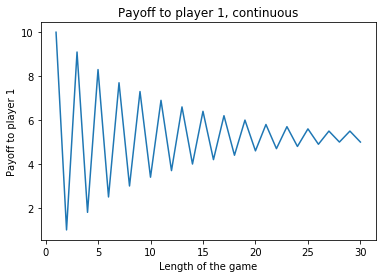

In [18]:
#continuous graph for payoffs player 1
range_x = np.arange(1,31,1)
plt.plot(range_x, [outcome(n,0.9)[0] for n in range_x])
plt.title('Payoff to player 1, continuous')
plt.xlabel('Length of the game')
plt.ylabel('Payoff to player 1')

Text(0,0.5,'Payoff to player 1')

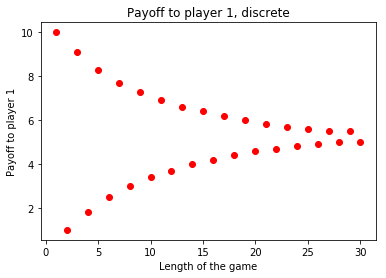

In [19]:
#discrete graph for payoffs player 1
range_x = np.arange(1,31,1)
plt.plot(range_x, [outcome(n,0.9)[0] for n in range_x], 'ro')    
plt.title('Payoff to player 1, discrete')
plt.xlabel('Length of the game')
plt.ylabel('Payoff to player 1')

**7)** [0.5 point] What pattern do you see in the graph? What is the intuition/explanation for this?

For player 1 it's the smartest to make a high enough bid (so player 2 accepts) as soon as possible because he then receives a higher payoff than when he would accept a bid from player 2. On top of that it preferebly has to be in the least rounds possible because the total payoff keeps shrinking (due to delta < 1).